Part 1.1



In [1]:
import pandas as pd
#import numpy as np

df = pd.read_csv('/content/Dados_Comerciais.csv',sep=';',encoding='latin-1')
df.head()

,ID-Produto,Produto,Categoria,Data Venda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,04/10/2012,"R$ 345,00"
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,01/01/2012,"R$ 712,00"
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,02/02/2012,"R$ 390,00"
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,03/03/2012,"R$ 200,00"
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,04/04/2012,"R$ 234,00"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID-Produto  457 non-null    object
 1   Produto     457 non-null    object
 2   Categoria   457 non-null    object
 3   Data Venda  457 non-null    object
 4   Custo       457 non-null    object
dtypes: object(5)
memory usage: 18.0+ KB


In [3]:
#Adicionar, por aleatoriedade, a quantidade dos produtos

#Código previamente usado: np.random.randint(1,10,size=len(df.index))
quantities = [6, 8, 3, 9, 5, 4, 4, 3, 1, 6, 8, 2, 9, 2, 7, 2, 3, 3, 5, 4, 6, 7,
       7, 7, 3, 3, 3, 8, 9, 8, 7, 6, 9, 4, 9, 6, 3, 5, 8, 1, 1, 7, 1, 6,
       2, 8, 2, 8, 9, 3, 3, 7, 3, 7, 5, 8, 8, 6, 5, 1, 5, 1, 2, 7, 7, 4,
       8, 5, 1, 2, 9, 8, 6, 9, 5, 3, 7, 6, 4, 5, 4, 2, 5, 7, 7, 4, 4, 5,
       6, 2, 1, 9, 5, 4, 6, 4, 1, 4, 6, 5, 1, 3, 1, 3, 1, 1, 1, 2, 6, 2,
       1, 8, 9, 6, 4, 9, 3, 1, 5, 1, 6, 7, 4, 6, 1, 7, 7, 5, 9, 9, 7, 8,
       1, 1, 9, 3, 6, 1, 6, 7, 7, 8, 8, 9, 8, 7, 2, 5, 8, 4, 2, 2, 6, 7,
       8, 6, 4, 7, 4, 9, 7, 9, 2, 1, 3, 8, 4, 9, 7, 4, 9, 8, 9, 3, 6, 3,
       3, 7, 2, 5, 7, 3, 7, 3, 1, 4, 6, 1, 1, 8, 2, 6, 1, 6, 6, 3, 1, 5,
       2, 9, 7, 4, 3, 2, 5, 8, 5, 7, 3, 2, 7, 2, 3, 2, 4, 1, 6, 4, 1, 8,
       3, 4, 2, 6, 1, 7, 8, 8, 2, 9, 7, 1, 6, 1, 4, 2, 2, 8, 6, 6, 3, 1,
       5, 8, 2, 4, 7, 9, 5, 3, 9, 6, 6, 6, 9, 3, 5, 8, 8, 9, 3, 3, 9, 5,
       3, 4, 6, 7, 3, 9, 9, 9, 6, 6, 9, 9, 8, 4, 2, 7, 7, 4, 4, 7, 4, 7,
       5, 5, 1, 5, 3, 5, 5, 3, 3, 6, 1, 6, 6, 1, 5, 6, 8, 4, 5, 2, 3, 6,
       3, 2, 3, 3, 1, 4, 1, 8, 1, 7, 1, 1, 9, 9, 6, 8, 1, 5, 1, 9, 9, 9,
       2, 5, 1, 6, 2, 9, 5, 3, 7, 7, 9, 8, 4, 2, 5, 2, 2, 2, 4, 6, 5, 5,
       6, 6, 3, 8, 9, 4, 7, 4, 7, 3, 5, 7, 3, 4, 5, 5, 5, 1, 9, 6, 9, 7,
       9, 5, 4, 7, 8, 4, 9, 2, 6, 5, 9, 8, 3, 2, 2, 9, 8, 2, 1, 5, 3, 2,
       6, 4, 8, 1, 9, 9, 6, 9, 8, 9, 5, 9, 6, 9, 7, 9, 6, 3, 3, 7, 6, 2,
       4, 4, 4, 7, 7, 6, 8, 6, 8, 5, 7, 8, 3, 3, 1, 6, 4, 6, 9, 2, 8, 8,
       3, 7, 1, 2, 1, 2, 9, 7, 1, 8, 7, 3, 7, 6, 5, 7, 3]

df['Quantidade'] = pd.Series(quantities)

In [4]:
#Transformação em ID-Produto
df['ID-Produto'] = pd.Series([int(x[4:]) for x in df['ID-Produto']])

#Transformação em Data Venda
df['Data Venda'] = pd.Series([x[:8] + '23' for x in df['Data Venda']])
df['Data Venda'] = pd.to_datetime(df['Data Venda'],dayfirst=True)

#Transformação em Custo
df['Custo'] = df['Custo'].str.replace(',','.').str.replace('R$','')
df['Custo'] = df['Custo'].astype(float)

df.head()

,ID-Produto,Produto,Categoria,Data Venda,Custo,Quantidade
0,1,LG K10 TV Power,Celulares,2023-10-04,345.0,6
1,2,Geladeira Duplex,Eletrodomésticos,2023-01-01,712.0,8
2,3,Lavadora 11 Kg,Eletrodomésticos,2023-02-02,390.0,3
3,4,Lavadora 11 Kg,Eletrodomésticos,2023-03-03,200.0,9
4,5,Lavadora 11 Kg,Eletrodomésticos,2023-04-04,234.0,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID-Produto  457 non-null    int64         
 1   Produto     457 non-null    object        
 2   Categoria   457 non-null    object        
 3   Data Venda  457 non-null    datetime64[ns]
 4   Custo       457 non-null    float64       
 5   Quantidade  457 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 21.5+ KB


In [6]:
df.isna().sum()

,0
ID-Produto,0
Produto,0
Categoria,0
Data Venda,0
Custo,0
Quantidade,0


In [7]:
df.isnull().sum()

,0
ID-Produto,0
Produto,0
Categoria,0
Data Venda,0
Custo,0
Quantidade,0


In [8]:
df = df.rename(columns={'Data Venda':'Data_Venda'})
df = df.set_index('ID-Produto')
df.to_csv('data_clean.csv',sep=';')

Parte 1.2

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/data_clean.csv',sep=';')
df['Valor'] = df['Quantidade'] * df['Custo']
df.head()

,ID-Produto,Produto,Categoria,Data_Venda,Custo,Quantidade,Valor
0,1,LG K10 TV Power,Celulares,2023-10-04,345.0,6,2070.0
1,2,Geladeira Duplex,Eletrodomésticos,2023-01-01,712.0,8,5696.0
2,3,Lavadora 11 Kg,Eletrodomésticos,2023-02-02,390.0,3,1170.0
3,4,Lavadora 11 Kg,Eletrodomésticos,2023-03-03,200.0,9,1800.0
4,5,Lavadora 11 Kg,Eletrodomésticos,2023-04-04,234.0,5,1170.0


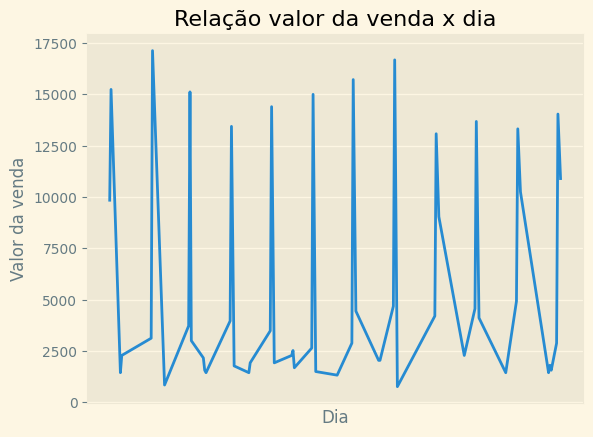

In [10]:
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

x = df.sort_values('Data_Venda')['Data_Venda'].unique()
y = df.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].sum()
y = y.reset_index()['Valor']

plt.style.use('Solarize_Light2')
plt.plot(x,y)
plt.title('Relação valor da venda x dia')
plt.xlabel('Dia')
plt.ylabel('Valor da venda')
plt.xticks([])
plt.show()

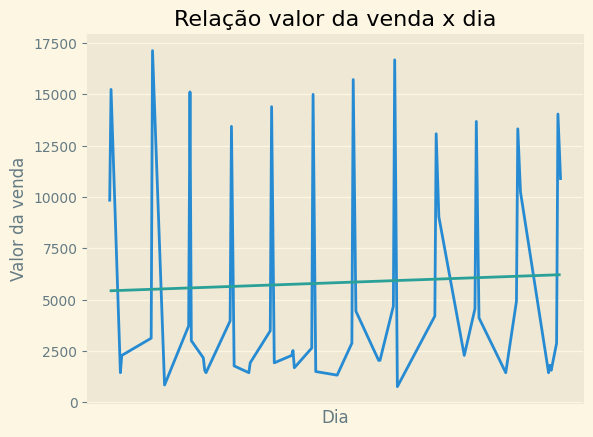

In [11]:
df['Dia'] = (df['Data_Venda'] - pd.to_datetime('2023-01-01')).dt.days
x = df.sort_values('Data_Venda')['Dia'].unique().reshape(-1,1)
y = df.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].sum()
y = y.reset_index()['Valor']

regressao = LinearRegression().fit(x,y)
predicao = regressao.predict(x)

plt.style.use('Solarize_Light2')
plt.plot(x,y)
plt.plot(x,predicao)
plt.title('Relação valor da venda x dia')
plt.xlabel('Dia')
plt.ylabel('Valor da venda')
plt.xticks([])
plt.show()

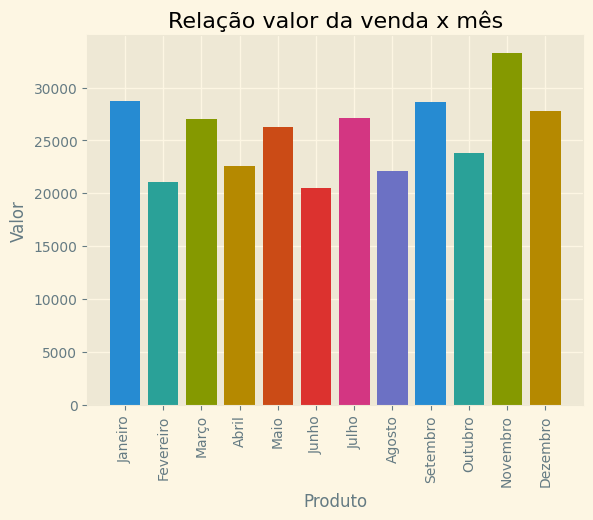

In [12]:
meses = {'Janeiro':1,'Fevereiro':2,'Março':3,'Abril':4,
         'Maio':5,'Junho':6,'Julho':7,'Agosto':8,
         'Setembro':9,'Outubro':10,'Novembro':11,'Dezembro':12}

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for mes,num in meses.items():
  df_prod = df[df['Data_Venda'].dt.month == num]
  ax.bar(mes,df_prod['Valor'].sum())
  plt.xticks(rotation=90)
ax.set_ylabel("Valor")
ax.set_xlabel("Produto")
plt.title('Relação valor da venda x mês')
plt.show()

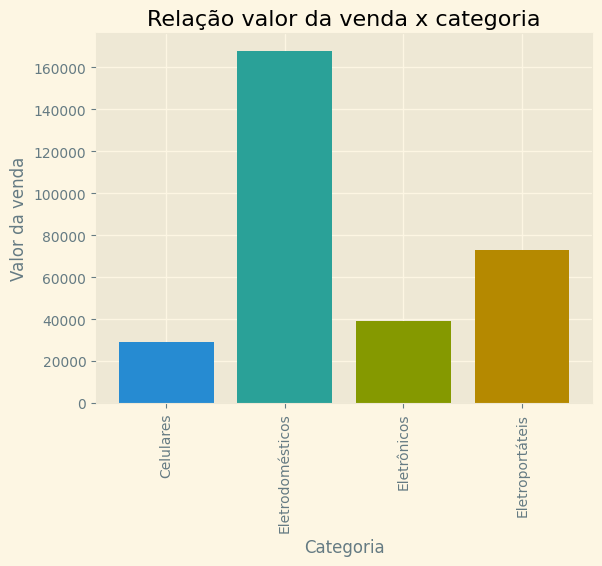

In [13]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for categ in df['Categoria'].unique():
  df_prod = df[df['Categoria'] == categ]
  ax.bar(categ,df_prod['Valor'].sum())
  plt.xticks(rotation=90)
ax.set_ylabel("Valor da venda")
ax.set_xlabel("Categoria")
plt.title('Relação valor da venda x categoria')
plt.show()

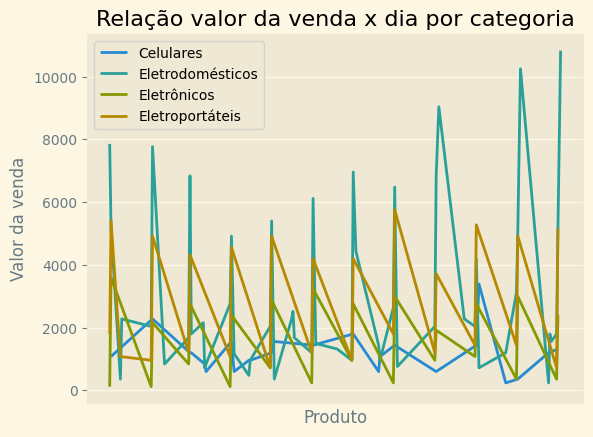

In [14]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for categ in df['Categoria'].unique():
  df_prod = df[df['Categoria'] == categ]
  x = df_prod.sort_values('Data_Venda')['Data_Venda'].unique()
  y = df_prod.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].sum()
  y = y.reset_index()['Valor']
  ax.plot(x,y)
ax.set_ylabel("Valor da venda")
ax.set_xlabel("Produto")
plt.xticks([])
plt.legend(df['Categoria'].unique())
plt.title('Relação valor da venda x dia por categoria')
plt.show()

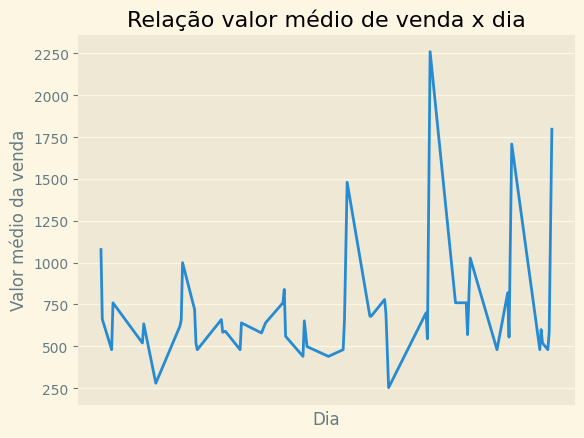

In [15]:
x = df.sort_values('Data_Venda')['Data_Venda'].unique()
y = df.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].mean()
y = y.reset_index()['Valor']

plt.style.use('Solarize_Light2')
plt.plot(x,y)
plt.title('Relação valor médio de venda x dia')
plt.xlabel('Dia')
plt.ylabel('Valor médio da venda')
plt.xticks([])
plt.show()

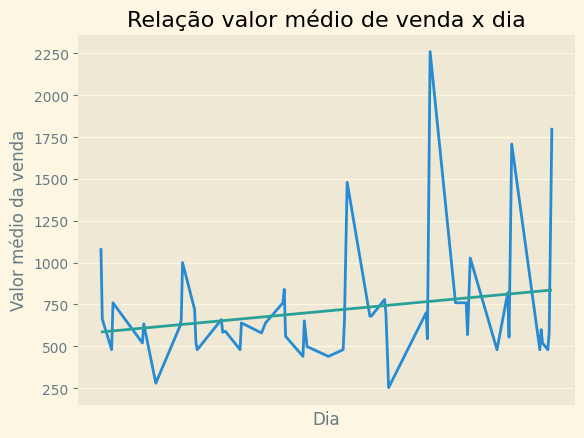

In [16]:
x = df.sort_values('Data_Venda')['Dia'].unique().reshape(-1,1)
y = df.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].mean()
y = y.reset_index()['Valor']

regressao = LinearRegression().fit(x,y)
predicao = regressao.predict(x)

plt.style.use('Solarize_Light2')
plt.plot(x,y)
plt.plot(x,predicao)
plt.title('Relação valor médio de venda x dia')
plt.xlabel('Dia')
plt.ylabel('Valor médio da venda')
plt.xticks([])
plt.show()

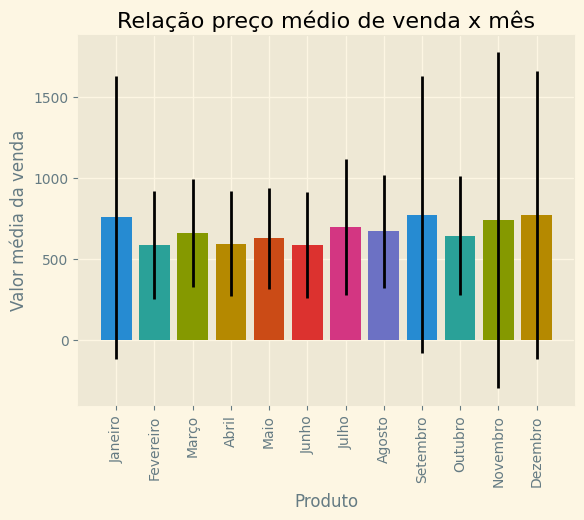

In [17]:
meses = {'Janeiro':1,'Fevereiro':2,'Março':3,'Abril':4,
         'Maio':5,'Junho':6,'Julho':7,'Agosto':8,
         'Setembro':9,'Outubro':10,'Novembro':11,'Dezembro':12}

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for mes,num in meses.items():
  df_prod = df[df['Data_Venda'].dt.month == num]
  ax.bar(mes,df_prod['Valor'].mean(),yerr=df_prod['Valor'].std())
  plt.xticks(rotation=90)
ax.set_ylabel("Valor média da venda")
ax.set_xlabel("Produto")
plt.title('Relação preço médio de venda x mês')
plt.show()

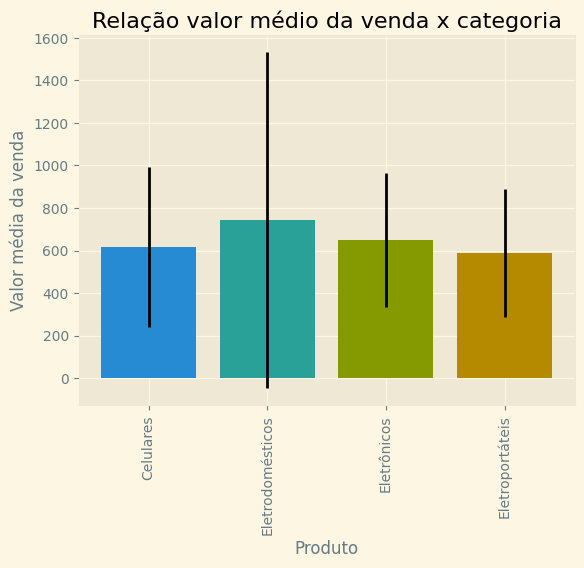

In [18]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for categ in df['Categoria'].unique():
  df_prod = df[df['Categoria'] == categ]
  ax.bar(categ,df_prod['Valor'].mean(),yerr=df_prod['Valor'].std())
  plt.xticks(rotation=90)
ax.set_ylabel("Valor média da venda")
ax.set_xlabel("Produto")
plt.title('Relação valor médio da venda x categoria')
plt.show()

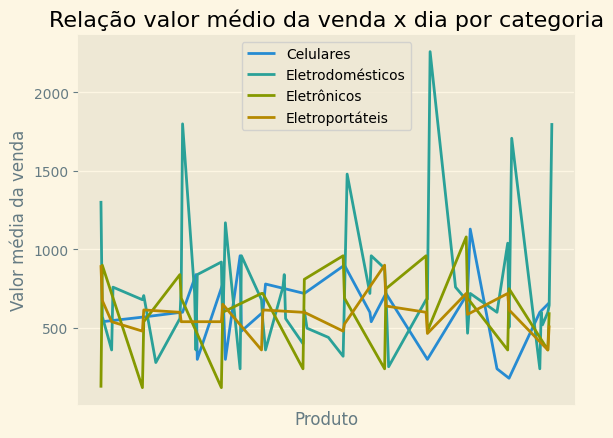

In [20]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
for categ in df['Categoria'].unique():
  df_prod = df[df['Categoria'] == categ]
  x = df_prod.sort_values('Data_Venda')['Data_Venda'].unique()
  y = df_prod.sort_values('Data_Venda').groupby('Data_Venda')['Valor'].mean()
  y = y.reset_index()['Valor']
  ax.plot(x,y)
ax.set_ylabel("Valor média da venda")
ax.set_xlabel("Produto")
plt.xticks([])
plt.legend(df['Categoria'].unique())
plt.title('Relação valor médio da venda x dia por categoria')
plt.show()

Parte 2

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("Analytics").getOrCreate()
df = spark.read.csv("/content/data_clean.csv",sep=';',header=True)

df.show()

+----------+----------------+----------------+----------+-----+----------+
|ID-Produto|         Produto|       Categoria|Data_Venda|Custo|Quantidade|
+----------+----------------+----------------+----------+-----+----------+
|         1| LG K10 TV Power|       Celulares|2023-10-04|345.0|         6|
|         2|Geladeira Duplex|Eletrodomésticos|2023-01-01|712.0|         8|
|         3|  Lavadora 11 Kg|Eletrodomésticos|2023-02-02|390.0|         3|
|         4|  Lavadora 11 Kg|Eletrodomésticos|2023-03-03|200.0|         9|
|         5|  Lavadora 11 Kg|Eletrodomésticos|2023-04-04|234.0|         5|
|         6|  Lavadora 11 Kg|Eletrodomésticos|2023-05-04| 90.0|         4|
|         7|Geladeira Duplex|Eletrodomésticos|2023-06-04|134.0|         4|
|         8|Geladeira Duplex|Eletrodomésticos|2023-07-04|800.0|         3|
|         9|Geladeira Duplex|Eletrodomésticos|2023-08-04|400.0|         1|
|        10|Geladeira Duplex|Eletrodomésticos|2023-09-04|600.0|         6|
|        11|Geladeira Dup

In [22]:
df.createOrReplaceTempView("tb_vendas")

query = '''SELECT Produto,
            Categoria,
            ROUND(SUM(Quantidade * Custo),2) AS Valor_SUM
            FROM tb_vendas
            GROUP BY Produto, Categoria
            ORDER BY Valor_SUM DESC'''
resultado = spark.sql(query)
resultado.show()

+--------------------+----------------+---------+
|             Produto|       Categoria|Valor_SUM|
+--------------------+----------------+---------+
|    Geladeira Duplex|Eletrodomésticos|  94232.0|
|         Micro-Ondas|Eletrodomésticos|  34800.0|
|           Aspirador| Eletroportáteis|  34080.0|
|  Impressora Deskjet|     Eletrônicos|  25920.0|
|    Morotola Moto G5|       Celulares|  15000.0|
|          Ventilador| Eletroportáteis|  12840.0|
|    Samsung Galaxy 8|       Celulares|  10920.0|
|      Lavadora 11 Kg|Eletrodomésticos|  10860.0|
|          Fritadeira| Eletroportáteis|  10320.0|
|Processador de Al...| Eletroportáteis|   9720.0|
|      Secadora Vapor|Eletrodomésticos|   8400.0|
|     Ar Condicionado|Eletrodomésticos|   7440.0|
|   Forno-Micro-Ondas|Eletrodomésticos|   6720.0|
|       Desktop 32 GB|     Eletrônicos|   6600.0|
|      Liquidificador| Eletroportáteis|   6000.0|
|  Notebook Dell 8 GB|     Eletrônicos|   5400.0|
|               Grill|Eletrodomésticos|   5400.0|


In [23]:
query = '''SELECT Produto,
            ROUND(SUM(Quantidade * Custo),2) AS Valor_SUM
            FROM tb_vendas
            WHERE MONTH(Data_Venda) = 6
            GROUP BY Produto
            ORDER BY Valor_SUM
            LIMIT 5'''
resultado = spark.sql(query)
resultado.show()

+------------------+---------+
|           Produto|Valor_SUM|
+------------------+---------+
|Notebook Dell 8 GB|    240.0|
|  Samsung Galaxy 8|    360.0|
|             Grill|    480.0|
|        Ventilador|    480.0|
|   Ar Condicionado|    600.0|
+------------------+---------+



In [24]:
import sqlite3

conn = sqlite3.connect('db_vendas.db')
cursor = conn.cursor()

df = pd.read_csv('/content/data_clean.csv',sep=';')

categorias = list(df['Categoria'].unique())
produtos = list(df['Produto'].unique())

try:
  tabela = '''CREATE TABLE IF NOT EXISTS tb_categoria(
    id INT PRIMARY KEY,
    categoria VARCHAR(25) NOT NULL
)'''
  cursor.execute(tabela)
  for i in range(len(categorias)):
    insert = f'''INSERT INTO tb_categoria VALUES ({i+1},'{categorias[i]}')'''
    cursor.execute(insert)
except Exception as e:
  print(f'Erro em Categoria: {e}')
  conn.close()
else:
  try:
    tabela = '''CREATE TABLE IF NOT EXISTS tb_produto(
      id INT PRIMARY KEY,
      produto VARCHAR(100) NOT NULL,
      id_categoria INT NOT NULL,
      CONSTRAINT fk_id_categoria_categoria
      FOREIGN KEY (id_categoria) REFERENCES tb_categoria(id)
  )'''
    cursor.execute(tabela)
    for i in range(len(produtos)):
      categoria = df[df['Produto'] == produtos[i]]['Categoria'].unique()[0]
      id_categoria = categorias.index(categoria) + 1
      insert = f'''INSERT INTO tb_produto
          VALUES ({i+1},'{produtos[i]}',{id_categoria})'''
      cursor.execute(insert)
  except Exception as e:
    print(f'Erro em Produtos: {e}')
    conn.close()
  else:
    try:
      tabela = '''CREATE TABLE IF NOT EXISTS tb_registro_venda(
        id INT PRIMARY KEY,
        id_produto INT NOT NULL,
        data_venda DATE NOT NULL,
        custo FLOAT(6,2) NOT NULL,
        quantidade INT NOT NULL,
        CONSTRAINT fk_id_produto_produto
        FOREIGN KEY (id_produto) REFERENCES tb_produto(id)
        )'''
      cursor.execute(tabela)
      for k,i in df.iterrows():
        id = i['ID-Produto']
        id_produto = produtos.index(i['Produto']) + 1
        data_venda = i['Data_Venda']
        custo = i['Custo']
        quantidade = i['Quantidade']
        insert = f'''INSERT INTO tb_registro_venda
                      VALUES ({id},{id_produto},'{data_venda}',{custo},{quantidade})'''
        cursor.execute(insert)
    except Exception as e:
      print(f'Erro em Registro de Venda: {e}')
      conn.close()
    else:
      conn.commit()
      print("Criação de banco de dados bem sucedida!")
      conn.close()

Criação de banco de dados bem sucedida!


In [25]:
conn = sqlite3.connect('db_vendas.db')
cursor = conn.cursor()

query = '''SELECT p.produto as Produto,
            c.categoria as Categoria,
            ROUND(SUM(r.quantidade * r.custo),2) AS Valor_SUM
            FROM tb_produto AS p
            INNER JOIN tb_categoria AS c
            ON p.id_categoria = c.id
            INNER JOIN tb_registro_venda AS r
            ON p.id = r.id_produto
            GROUP BY Produto, Categoria
            ORDER BY Valor_SUM DESC'''

df = pd.read_sql_query(query,conn)
df

,Produto,Categoria,Valor_SUM
0,Geladeira Duplex,Eletrodomésticos,94232.0
1,Micro-Ondas,Eletrodomésticos,34800.0
2,Aspirador,Eletroportáteis,34080.0
3,Impressora Deskjet,Eletrônicos,25920.0
4,Morotola Moto G5,Celulares,15000.0
5,Ventilador,Eletroportáteis,12840.0
6,Samsung Galaxy 8,Celulares,10920.0
7,Lavadora 11 Kg,Eletrodomésticos,10860.0
8,Fritadeira,Eletroportáteis,10320.0
9,Processador de Alimentos,Eletroportáteis,9720.0


In [26]:
conn = sqlite3.connect('db_vendas.db')
cursor = conn.cursor()

query = '''SELECT p.produto as Produto,
            ROUND(SUM(r.quantidade * r.custo),2) AS Valor_SUM
            FROM tb_produto AS p
            INNER JOIN tb_categoria AS c
            ON p.id_categoria = c.id
            INNER JOIN tb_registro_venda AS r
            ON p.id = r.id_produto
            WHERE strftime('%m',r.data_venda) = '06'
            GROUP BY Produto, Categoria
            ORDER BY Valor_SUM
            LIMIT 5'''

df = pd.read_sql_query(query,conn)
df

,Produto,Valor_SUM
0,Notebook Dell 8 GB,240.0
1,Samsung Galaxy 8,360.0
2,Grill,480.0
3,Ventilador,480.0
4,Ar Condicionado,600.0


In [27]:
conn.close()